<a href="https://colab.research.google.com/github/fahimvj/Bengali_SMS_Spam_using_ML_MC191010/blob/main/sms_spam_mc191010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install bangla_stemmer

In [14]:
!pip install banglanltk

In [15]:
#pip install streamlit -q

In [28]:
#importing All the libraries for Cleaning, Pre-processing, modeling and classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy

import nltk
nltk.download('punkt')
# data preprocessing
import banglanltk as bn
import string


import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from bangla_stemmer.stemmer import stemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
data = pd.read_csv("bangla_spam.csv")
data.head()

,type,text
0,spam,আকর্ষণীয় ১৫% ছাড়* ৳১০০ পর্যন্ত! উপায় অ্যাপ দিয়...
1,spam,আরিফিন শুভ অভিনীত ভালো থেকো দেখুন রবি স্ক্রিন...
2,spam,প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না...
3,ham,আলহামদুলিল্লাহ সব একই আছে।
4,ham,কোভিড-১৯ ভ্যাকসিন নিবন্ধনঃ আপনার OTP কোড-00465...


In [30]:
#Initial Exploration (Data Clearning)

data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates(keep='first')
data.head(5)

,type,text
0,spam,আকর্ষণীয় ১৫% ছাড়* ৳১০০ পর্যন্ত! উপায় অ্যাপ দিয়...
1,spam,আরিফিন শুভ অভিনীত ভালো থেকো দেখুন রবি স্ক্রিন...
2,spam,প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না...
3,ham,আলহামদুলিল্লাহ সব একই আছে।
4,ham,কোভিড-১৯ ভ্যাকসিন নিবন্ধনঃ আপনার OTP কোড-00465...


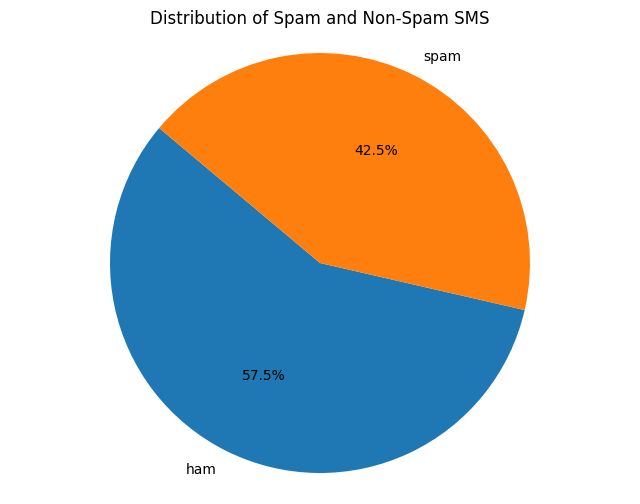

In [31]:
#Exploratory Data Analysis (EDA)

#1 data distribution
data['type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam SMS')
plt.axis('equal')
plt.show()

Average Length of Spam SMS: 113.09024390243903
Average Length of Ham SMS: 70.40900900900901


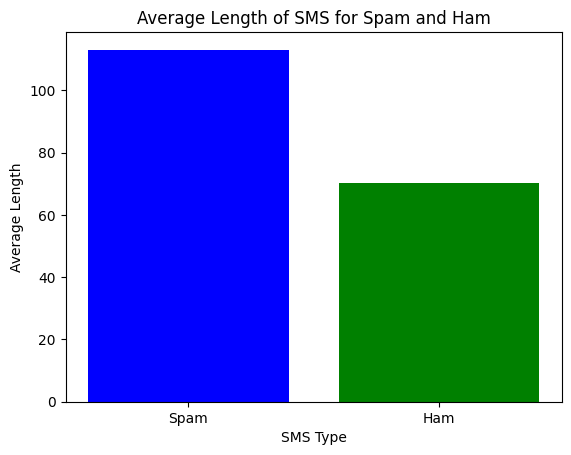

In [34]:
#2 average length of sms for spam and ham
data['Length'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(bn.word_tokenize).apply(len)
data['num_sentence'] = data['text'].apply(bn.sent_tokenize).apply(len)
data.head(2)
avg_length_spam = data[data['type'] == 'spam']['Length'].mean()
avg_length_ham = data[data['type'] == 'ham']['Length'].mean()
#plotting
print("Average Length of Spam SMS:", avg_length_spam)
print("Average Length of Ham SMS:", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Blue', 'green'])
plt.title('Average Length of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Length')
plt.show()

Average Words of Spam SMS: 16.25609756097561
Average Words of Ham SMS: 12.158558558558559


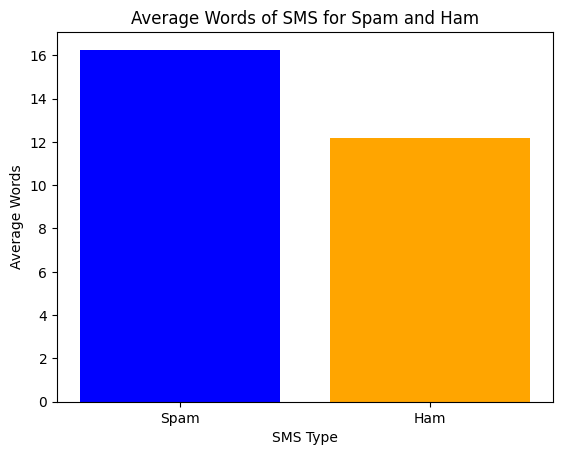

In [35]:
#3 Average Word of SMS for Spam and Ham

avg_word_spam = data[data['type'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['type'] == 'ham']['num_words'].mean()
print("Average Words of Spam SMS:", avg_word_spam)
print("Average Words of Ham SMS:", avg_word_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'orange'])
plt.title('Average Words of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Words')
plt.show()

Average Sentence of Spam SMS: 1.8878048780487804
Average Sentence of Ham SMS: 1.9207207207207206


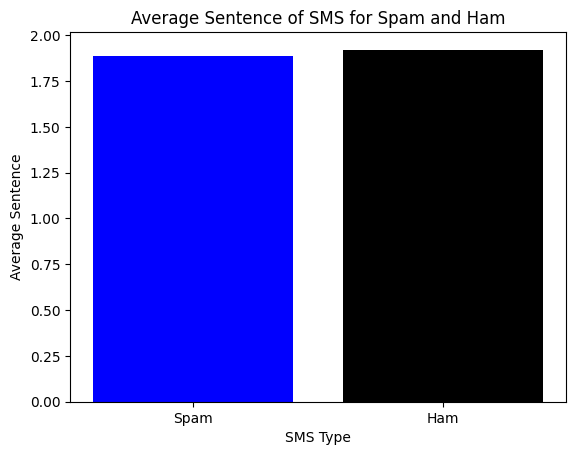

In [36]:
# 4- Average Sentence of SMS for Spam and Ham

avg_sentence_spam = data[data['type'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = data[data['type'] == 'ham']['num_sentence'].mean()
print("Average Sentence of Spam SMS:", avg_sentence_spam)
print("Average Sentence of Ham SMS:", avg_sentence_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Blue', 'black'])
plt.title('Average Sentence of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Sentence')
plt.show()

Correlation coefficient between SMS length and spam classification: 0.17091612697054318


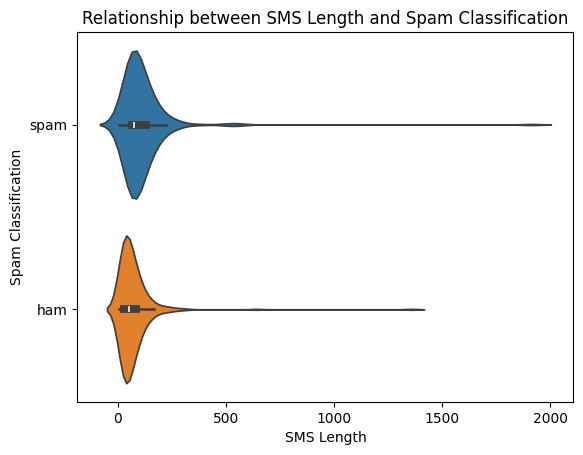

In [37]:
# 5- Relationship between Length and Spam
correlation = data['Length'].corr((data['type'] == 'spam').astype(int))
print("Correlation coefficient between SMS length and spam classification:", correlation)


sns.violinplot(data=data, x='Length', y='type', hue='type')
plt.xlabel('SMS Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between SMS Length and Spam Classification')
plt.show()



The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.987797      0.448719
num_words     0.987797   1.000000      0.466135
num_sentence  0.448719   0.466135      1.000000


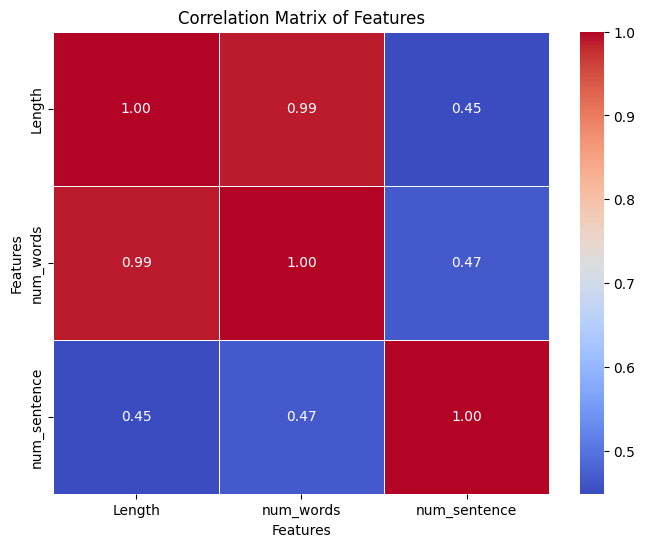

In [38]:
#6- Relationship between Features

correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
#Data Preprocessing

#cleaning text
data['transform_text'] = data['text'].apply(bn.clean_text)

# Tokenization
data['transform_text'] = data['transform_text'].apply(bn.word_tokenize)

# Stemming
stmr = stemmer.BanglaStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [stmr.stem(word) for word in x])

#Convert the preprocessed text back to string
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))


In [40]:
# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  আকর্ষণীয় ১৫% ছাড়* ৳১০০ পর্যন্ত! উপায় অ্যাপ দিয়...   
1  আরিফিন শুভ অভিনীত ভালো থেকো দেখুন  রবি স্ক্রিন...   
2  প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না...   
3                         আলহামদুলিল্লাহ সব একই আছে।   
4  কোভিড-১৯ ভ্যাকসিন নিবন্ধনঃ আপনার OTP কোড-00465...   

                                      transform_text  
0  আকর্ষণীয় ১৫% ছাড় ৳১০০ পর্যন্ত উপায় অ্যাপ দিয়ে ...  
1  আরিফিন শুভ অভিনীত ভালো থেকো দেখুন রবি স্ক্রিনে...  
2  প্রতিদিন ভাগ্য রাশিফল পেত টিয়া পাখির কথা না শু...  
3                            আলহামদুলিল্লাহ সব এক আছ  
4  কোভিড১৯ ভ্যাকসিন নিবন্ধনঃ আপন OTP কোড004653 ধন...  


In [41]:
#Removing Stopwords using bengali stopwords dataset
data1 =pd.read_excel('stopwords_bangla.xlsx')
stop = data1['words'].tolist()

def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)


data['transform_text'] = data['transform_text'].apply(stopwordRemoval)

# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  আকর্ষণীয় ১৫% ছাড়* ৳১০০ পর্যন্ত! উপায় অ্যাপ দিয়...   
1  আরিফিন শুভ অভিনীত ভালো থেকো দেখুন  রবি স্ক্রিন...   
2  প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না...   
3                         আলহামদুলিল্লাহ সব একই আছে।   
4  কোভিড-১৯ ভ্যাকসিন নিবন্ধনঃ আপনার OTP কোড-00465...   

                                      transform_text  
0  আকর্ষণীয় ১৫% ছাড় ৳১০০ উপায় অ্যাপ বিডিটিকেটস পে...  
1  আরিফিন শুভ অভিনীত ভালো থেকো দেখুন রবি স্ক্রিনে...  
2  প্রতিদিন ভাগ্য রাশিফল পেত টিয়া পাখির কথা না শু...  
3                                  আলহামদুলিল্লাহ আছ  
4  কোভিড১৯ ভ্যাকসিন নিবন্ধনঃ আপন OTP কোড004653 ধন...  


In [53]:
#Removing Unecessary charachters,Emojis,Punctuations with the help of Regex.

def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

data['transform_text'] = data['transform_text'].apply(preprocessing)

# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  আকর্ষণীয় ১৫% ছাড়* ৳১০০ পর্যন্ত! উপায় অ্যাপ দিয়...   
1  আরিফিন শুভ অভিনীত ভালো থেকো দেখুন  রবি স্ক্রিন...   
2  প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না...   
3                         আলহামদুলিল্লাহ সব একই আছে।   
4  কোভিড-১৯ ভ্যাকসিন নিবন্ধনঃ আপনার OTP কোড-00465...   

                                      transform_text  
0  আকর্ষণীয়  ছাড়  উপায় অ্যাপ বিডিটিকেটস পেমেন্ট ছ...  
1    আরিফিন শুভ অভিনীত ভালো থেকো দেখুন রবি স্ক্রিনে   
2  প্রতিদিন ভাগ্য রাশিফল পেত টিয়া পাখির কথা না শু...  
3                                  আলহামদুলিল্লাহ আছ  
4           কোভিড ভ্যাকসিন নিবন্ধনঃ আপন  কোড ধন্যবাদ  


In [43]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out#Most common words in SPAM SMS
spam_sms = data[data['type'] == 'spam']['transform_text']
spam_sms.head()
# Tokenize the text in spam sms
spam_words = ' '.join(spam_sms).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam SMS:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    # Generate Word Cloud


Top 10 Most Common Words in Spam SMS:
করুন: 126 occurrences
টাকা: 84 occurrences
অফ: 57 occurrences
ডায়াল: 54 occurrences
পেত: 50 occurrences
কর: 50 occurrences
নিন: 50 occurrences
আপন: 44 occurrences
থেক: 41 occurrences
আকর্ষণীয়: 34 occurrences


In [44]:
#Most common words in HAM SMS
spam_sms = data[data['type'] == 'ham']['transform_text']
spam_sms.head()
# Tokenize the text in spam sms
spam_words = ' '.join(spam_sms).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam SMS:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


Top 10 Most Common Words in Spam SMS:
না: 108 occurrences
কর: 97 occurrences
আম: 84 occurrences
আমা: 55 occurrences
টাকা: 54 occurrences
থেক: 51 occurrences
আছ: 25 occurrences
বিল: 24 occurrences
বল: 24 occurrences
থাক: 23 occurrences


In [45]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data.sample(2)

#data spliting and vectorization
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['text']).toarray()
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Splitting Data Set into Train data and Test data for model building")
print("X_train,y_train: ",X_train.shape,y_train.shape)
print("X_test,y_test: ",X_test.shape,y_test.shape)

Splitting Data Set into Train data and Test data for model building
X_train,y_train:  (675, 1000) (675,)
X_test,y_test:  (290, 1000) (290,)


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
#print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))
print("Recall Score: ",recall_score(y_test,y_pred_svc))
print("F1 Score: ",f1_score(y_test,y_pred_svc))

SVM Accuracy: 0.95
Precision Score:  0.9739130434782609
Recall Score:  0.9105691056910569
F1 Score:  0.9411764705882353


In [47]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
#print("confusion Matrix :",confusion_matrix(y_test,y_pred_rf))
print("Precision Score: ",precision_score(y_test,y_pred_rf))
print("Recall Score: ",recall_score(y_test,y_pred_rf))
print("F1 Score: ",f1_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.94
Precision Score:  1.0
Recall Score:  0.8699186991869918
F1 Score:  0.9304347826086956


In [48]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
#print("confusion Matrix :",confusion_matrix(y_test,y_pred_nb))
print("Precision Score: ",precision_score(y_test,y_pred_nb))
print("Recall Score: ",recall_score(y_test,y_pred_nb))
print("F1 Score: ",f1_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.90
Precision Score:  0.9795918367346939
Recall Score:  0.7804878048780488
F1 Score:  0.8687782805429864


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
print("Precision Score:", precision_score(y_test, y_pred_dt))
print("Recall Score: ",recall_score(y_test,y_pred_dt))
print("F1 Score: ",f1_score(y_test,y_pred_dt))

Decision Tree Accuracy: 0.88
Precision Score: 0.8617886178861789
Recall Score:  0.8617886178861789
F1 Score:  0.861788617886179


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the neural network model
nn_model = Sequential()

# Add input layer and first hidden layer
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))

# Add second hidden layer
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))

# Add output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.4).astype("int32")

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_nn))
print("Precision Score:", precision_score(y_test, y_pred_nn))
print("Recall Score: ",recall_score(y_test,y_pred_nn))
print("F1 Score: ",f1_score(y_test,y_pred_nn))

Epoch 1/5
22/22 [==============================] - 1s 16ms/step - loss: 0.6817 - accuracy: 0.5778 - val_loss: 0.6694 - val_accuracy: 0.5759
Epoch 2/5
22/22 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.6104 - val_loss: 0.6264 - val_accuracy: 0.5828
Epoch 3/5
22/22 [==============================] - 0s 6ms/step - loss: 0.5843 - accuracy: 0.6385 - val_loss: 0.5419 - val_accuracy: 0.7103
Epoch 4/5
22/22 [==============================] - 0s 6ms/step - loss: 0.4672 - accuracy: 0.8370 - val_loss: 0.4090 - val_accuracy: 0.8793
Epoch 5/5
10/10 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.93
Precision Score: 0.9180327868852459
Recall Score:  0.9105691056910569
F1 Score:  0.9142857142857143


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
print("Precision Score:", precision_score(y_test, y_pred_dt))
print("Recall Score: ",recall_score(y_test,y_pred_dt))
print("F1 Score: ",f1_score(y_test,y_pred_dt))

Decision Tree Accuracy: 0.91
Precision Score: 0.9047619047619048
Recall Score:  0.8941176470588236
F1 Score:  0.8994082840236687


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the model
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_logreg))
print("Precision Score:", precision_score(y_test, y_pred_logreg))
print("Recall Score: ",recall_score(y_test,y_pred_logreg))
print("F1 Score: ",f1_score(y_test,y_pred_logreg))

Logistic Regression Accuracy: 0.92
Precision Score: 0.9629629629629629
Recall Score:  0.8455284552845529
F1 Score:  0.9004329004329005


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['transform_text'])
X = tokenizer.texts_to_sequences(data['transform_text'])
# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=100)
# Encode the labels
y = data['type']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the GRU model
gru_model = Sequential()
# Add embedding layer
gru_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
# Add GRU layer
gru_model.add(GRU(128, return_sequences=True))
gru_model.add(Dropout(0.5))
# Add another GRU layer
gru_model.add(GRU(64))
gru_model.add(Dropout(0.5))
# Add output layer
gru_model.add(Dense(1, activation='sigmoid'))
# Compile the model
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
gru_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
# Predict on the test set
y_pred_gru = (gru_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"GRU Accuracy: {accuracy_gru:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gru))
print("Precision Score:", precision_score(y_test, y_pred_gru))
print("Recall Score: ",recall_score(y_test,y_pred_gru))
print("F1 Score: ",f1_score(y_test,y_pred_gru))

Epoch 1/5
25/25 [==============================] - 11s 280ms/step - loss: 0.6300 - accuracy: 0.6477 - val_loss: 0.5235 - val_accuracy: 0.8031
Epoch 2/5
25/25 [==============================] - 5s 184ms/step - loss: 0.3027 - accuracy: 0.9249 - val_loss: 0.1209 - val_accuracy: 0.9637
Epoch 3/5
25/25 [==============================] - 4s 171ms/step - loss: 0.0860 - accuracy: 0.9793 - val_loss: 0.0650 - val_accuracy: 0.9896
Epoch 4/5
25/25 [==============================] - 8s 338ms/step - loss: 0.0680 - accuracy: 0.9806 - val_loss: 0.0398 - val_accuracy: 0.9948
Epoch 5/5
7/7 [==============================] - 1s 53ms/step
GRU Accuracy: 0.99
Precision Score: 0.9882352941176471
Recall Score:  0.9882352941176471
F1 Score:  0.9882352941176471


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['transform_text'])
X = tokenizer.texts_to_sequences(data['transform_text'])

# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=100)

# Encode the labels
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LSTM model
lstm_model = Sequential()

# Add embedding layer
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# Add LSTM layer
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))

# Add another LSTM layer
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))

# Add output layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm:.2f}")
#print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lstm))
print("Precision Score:", precision_score(y_test, y_pred_lstm))
print("Recall Score: ",recall_score(y_test,y_pred_lstm))
print("F1 Score: ",f1_score(y_test,y_pred_lstm))


Epoch 1/5
25/25 [==============================] - 14s 333ms/step - loss: 0.6664 - accuracy: 0.6308 - val_loss: 0.6327 - val_accuracy: 0.6373
Epoch 2/5
25/25 [==============================] - 7s 295ms/step - loss: 0.4832 - accuracy: 0.8174 - val_loss: 0.2766 - val_accuracy: 0.8964
Epoch 3/5
25/25 [==============================] - 6s 236ms/step - loss: 0.1441 - accuracy: 0.9611 - val_loss: 0.0887 - val_accuracy: 0.9845
Epoch 4/5
25/25 [==============================] - 8s 304ms/step - loss: 0.0750 - accuracy: 0.9806 - val_loss: 0.0608 - val_accuracy: 0.9845
Epoch 5/5
7/7 [==============================] - 1s 62ms/step
LSTM Accuracy: 0.99
Precision Score: 0.9883720930232558
Recall Score:  1.0
F1 Score:  0.9941520467836257


In [49]:
#Using SVM model to test the output
new_sms = [
    "প্রিয় গ্রাহক, আপনার নম্বরে ৮৫০.০ টাকা লোকাল বিল প্রদান করা হয়েছে |ধন্যবাদ |",
    "হ্যালু,ম্যাম আসসালামুয়ালাইকুম।",
    "প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না শুনে *26397*6#  ডায়াল করে জেনেনিন আপনার রাশি,  চার্জ ৳২.৬৭ দৈনিক",
    "নামাজ বেহেশতের চাবিকাঠি। ",
    "*213*2843# ডায়াল করে জানুন সেলস/মার্কেটিং চাকুরীর খবর ২.৬৭ টাকা/দিন",
    "তোমায় যদি-বুশরা শাহরিয়ার গানটি Airteltune সেট করতে dial *22788*951#",
    "Facebook-এ দুই-ধাপ বিশিষ্ট যাচাইকরণের জন্য 799199 ব্যবহার করুন৷"
]

# Convert new data into numerical vectors using the trained tfidf_vectorizer
new_X = tfidf.transform(new_sms)
new_X_dense = new_X.toarray()

# Use the trained SVM model to make predictions
svm_predictions = svc_classifier.predict(new_X_dense)

# Print the predictions
for email, prediction in zip(new_sms, svm_predictions):
    if prediction == 1:
        print(f"'{email}' ---------------- is predicted as spam.")
    else:
        print(f"'{email}' ---------------- is predicted as ham.")

'প্রিয় গ্রাহক, আপনার নম্বরে ৮৫০.০ টাকা লোকাল বিল প্রদান করা হয়েছে |ধন্যবাদ |' ---------------- is predicted as ham.
'হ্যালু,ম্যাম আসসালামুয়ালাইকুম।' ---------------- is predicted as ham.
'প্রতিদিনের ভাগ্য রাশিফল পেতে টিয়া পাখির কথা না শুনে *26397*6#  ডায়াল করে জেনেনিন আপনার রাশি,  চার্জ ৳২.৬৭ দৈনিক' ---------------- is predicted as spam.
'নামাজ বেহেশতের চাবিকাঠি। ' ---------------- is predicted as ham.
'*213*2843# ডায়াল করে জানুন সেলস/মার্কেটিং চাকুরীর খবর ২.৬৭ টাকা/দিন' ---------------- is predicted as spam.
'তোমায় যদি-বুশরা শাহরিয়ার গানটি Airteltune সেট করতে dial *22788*951#' ---------------- is predicted as spam.
'Facebook-এ দুই-ধাপ বিশিষ্ট যাচাইকরণের জন্য 799199 ব্যবহার করুন৷' ---------------- is predicted as ham.


In [50]:
def predict_sms(sms):
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    sms_vector = tfidf.transform([sms])

    # Convert sparse matrix to dense array
    sms_vector_dense = sms_vector.toarray()

    # Use the trained SVM model to make predictions
    prediction = svc_classifier.predict(sms_vector_dense)

    # Print the prediction
    if prediction[0] == 1:
        print("\n The sms is predicted as spam.")
    else:
        print("\n The sms is predicted as ham.")

# Get user input for email
user_sms = input("Enter the sms text: ")

# Predict whether the input sms is spam or ham
predict_sms(user_sms)

Enter the sms text: যাচাইকরণের 

 The sms is predicted as ham.


In [51]:
import pickle

In [54]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc_classifier,open('model.pkl','wb'))


In [55]:
!wget -q -O - ipv4.icanhazip.com

34.16.197.134


In [56]:
import streamlit as st

In [62]:
!streamlit run app.py & npx localtunnel --port 8501

#34.16.197.134




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.197.134:8501

npx: installed 22 in 2.226s
your url is: https://tidy-onions-tell.loca.lt
  Stopping...
^C
